In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,make_scorer
from sklearn.metrics import mean_absolute_error,confusion_matrix
from sklearn.metrics import mean_squared_error,accuracy_score
import lightgbm as LGB
from lightgbm import LGBMClassifier  # LightGBM
from lightgbm import LGBMRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 任务 1 财务数据处理

## 任务 1.1 
读取“LR.csv”，提取表 1 中所列字段的数据，筛选出字段“Typrep”值为“A”的数据，将筛选出的数据另存为文件“LR_1.csv”（文件编码设置为UTF-8），并在报告中呈现筛选后的数据行数、列数。
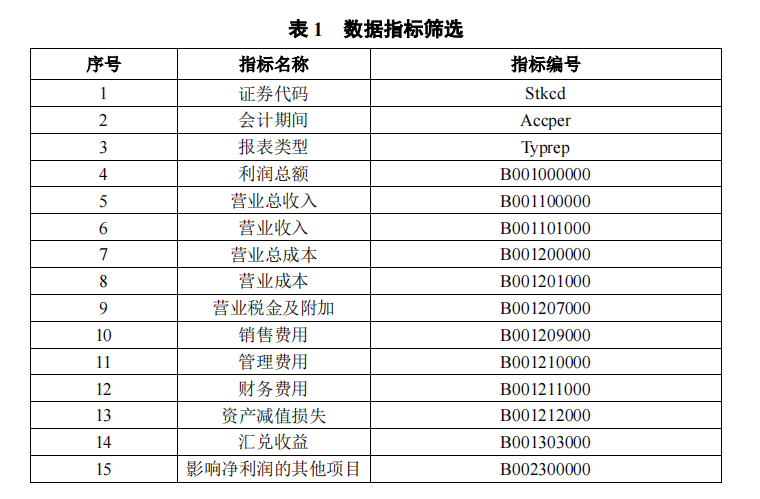

In [3]:
lr = pd.read_csv(r"data/LR.csv")

In [4]:
typrep_a = lr[lr["Typrep"]=="A"]

In [5]:
num_rows = typrep_a.shape[0]  # 形状中的第一个元素是行数  
num_cols = typrep_a.shape[1]  # 形状中的第二个元素是列数

In [6]:
print("LR_1的数据行数为:",num_rows)  
print("LR_1的数据列数为:",num_cols)

LR_1的数据行数为: 33414
LR_1的数据列数为: 63


In [7]:
typrep_a.to_csv(r'data/LR_1.csv', index=False, encoding='utf-8')

## 任务 1.2 
读取“LR_1.csv”、“ZCFZ.csv”、“Stk_ind.csv”三个数据文件。根据“Stkcd”、“Accper”和“Typrep”三个字段，提取“ZCFZ.csv”中字段为“A002000000”和“A001000000”的相应数据，合并到“LR_1.csv”中。根据字段“Stkcd”，提取“Stk_ind.csv”中字段为“Indnme”和“Nindnme”的相应数据，合并到“LR_1.csv”中。将完成合并的数据另存为文件“LR_2.csv”（文件编码设置为 UTF-8），并在报告中呈现合并后数据的行数、列数。

In [8]:
lr_1 = pd.read_csv(r"data/LR_1.csv")
zcfz = pd.read_csv(r"data/ZCFZ.csv")
stk_ind = pd.read_csv(r"data/Stk_ind.csv",encoding="gbk")

In [9]:
zcfz_data = zcfz.loc[:,["Stkcd","Accper","Typrep","A002000000","A001000000"]]
zcfz_data_a = zcfz_data[zcfz_data["Typrep"]=="A"]

In [10]:
lr_1 = pd.merge(lr_1, zcfz_data_a, on=["Stkcd","Accper","Typrep"], how='left')

In [11]:
lr_1 = pd.merge(lr_1, stk_ind, on=["Stkcd"], how='left')
lr_1.head()

,Stkcd,Accper,Typrep,B001100000,B001101000,Bbd1102000,Bbd1102101,Bbd1102203,B0i1103000,B0i1103101,...,B003000000,B004000000,B005000000,B006000000,B006000101,B006000102,A002000000,A001000000,Indnme,Nindnme
0,600696,2018-3-31,A,18784589.8,18784589.8,NaN,NaN,NaN,NaN,NaN,...,0.0200,0.0200,NaN,7.060818e+06,6.730615e+06,330203.02,4.437834e+08,7.455484e+08,房地产,房地产业
1,547,2018-3-31,A,517945246.5,517945246.5,NaN,NaN,NaN,NaN,NaN,...,0.0600,0.0600,-1098000.0,8.382837e+07,7.868980e+07,5138570.87,1.681114e+09,7.442314e+09,工业,信息技术业
2,2772,2018-3-31,A,267161661.1,267161661.1,NaN,NaN,NaN,NaN,NaN,...,0.2419,0.2364,NaN,8.953362e+07,8.824809e+07,1285531.73,1.422487e+09,4.176132e+09,综合,农业
3,2536,2018-3-31,A,696718212.6,696718212.6,NaN,NaN,NaN,NaN,NaN,...,0.2200,0.2200,NaN,7.501203e+07,7.462931e+07,382721.42,1.156527e+09,3.292607e+09,工业,交通运输设备制造业
4,818,2018-3-31,A,907539547.9,907539547.9,NaN,NaN,NaN,NaN,NaN,...,0.1900,0.1900,NaN,1.334303e+08,1.281042e+08,5326170.57,1.322972e+09,4.061964e+09,工业,化学原料及化学制品制造业


In [12]:
num_rows_2 = lr_1.shape[0]  # 形状中的第一个元素是行数  
num_cols_2 = lr_1.shape[1]  # 形状中的第二个元素是列数

In [13]:
print("LR_2的数据行数为:",num_rows_2)  
print("LR_2的数据列数为:",num_cols_2)

LR_2的数据行数为: 33414
LR_2的数据列数为: 67


In [14]:
lr_1.to_csv(r'data/LR_2.csv', index=False, encoding='utf-8')

## 任务 1.3 
读取“LR_2.csv”，删除空值占比达 70%及以上的数据列，将处理后的数据另存为文件“LR_3.csv”（文件编码设置为 UTF-8），并在报告中呈现处理后数据的列数。

In [15]:
lr_2 = pd.read_csv(r"data/LR_2.csv")

In [16]:
mask = (lr_2.apply(lambda x: sum(x.isnull()) / len(x)) < 0.7)  
lr_3 = lr_2.loc[:, mask]
lr_3.head()

,Stkcd,Accper,Typrep,B001100000,B001101000,B001200000,B001201000,B001207000,B001209000,B001210000,...,B003000000,B004000000,B005000000,B006000000,B006000101,B006000102,A002000000,A001000000,Indnme,Nindnme
0,600696,2018-3-31,A,18784589.8,18784589.8,1.068992e+07,7.810739e+06,204595.11,281510.68,2.260219e+06,...,0.0200,0.0200,NaN,7.060818e+06,6.730615e+06,330203.02,4.437834e+08,7.455484e+08,房地产,房地产业
1,547,2018-3-31,A,517945246.5,517945246.5,4.266916e+08,2.729517e+08,789386.98,12657162.87,1.344988e+08,...,0.0600,0.0600,-1098000.0,8.382837e+07,7.868980e+07,5138570.87,1.681114e+09,7.442314e+09,工业,信息技术业
2,2772,2018-3-31,A,267161661.1,267161661.1,1.898233e+08,1.527985e+08,694050.24,30133399.88,9.984417e+06,...,0.2419,0.2364,NaN,8.953362e+07,8.824809e+07,1285531.73,1.422487e+09,4.176132e+09,综合,农业
3,2536,2018-3-31,A,696718212.6,696718212.6,6.147475e+08,5.005676e+08,6804021.51,16800256.48,8.143943e+07,...,0.2200,0.2200,NaN,7.501203e+07,7.462931e+07,382721.42,1.156527e+09,3.292607e+09,工业,交通运输设备制造业
4,818,2018-3-31,A,907539547.9,907539547.9,7.338691e+08,6.535983e+08,15336943.77,24841913.58,3.475893e+07,...,0.1900,0.1900,NaN,1.334303e+08,1.281042e+08,5326170.57,1.322972e+09,4.061964e+09,工业,化学原料及化学制品制造业


In [17]:
num_rows_3 = lr_3.shape[0]  # 形状中的第一个元素是行数  
num_cols_3 = lr_3.shape[1]  # 形状中的第二个元素是列数

In [18]:
print("LR_3的数据行数为:",num_rows_3)  
print("LR_3的数据列数为:",num_cols_3)

LR_3的数据行数为: 33414
LR_3的数据列数为: 34


In [19]:
lr_3.to_csv(r'data/LR_3.csv', index=False, encoding='utf-8')

## 任务 1.4 
读取“LR_3.csv”，删除包含空值的行，将处理后的数据另存为文件“LR_4.csv”（文件编码设置为 UTF-8），并在报告中呈现处理后数据的行数。

In [20]:
lr_3 = pd.read_csv(r"data/LR_3.csv")
lr_4 = lr_3.dropna()
num_rows_4 = lr_4.shape[0] 
print("LR_4的数据行数为:",num_rows_4)  

LR_4的数据行数为: 4741


In [21]:
lr_4.to_csv(r'data/LR_4.csv', index=False, encoding='utf-8')

## 任务 1.5 
读取“LR_4.csv”，将字段“Accper”的日期数据转换为“YYYY-mm-dd”的格式，例如：“2018-1-31”转换为“2018-01-31”，将处理后的数据另存为文件“LR_5.csv”（文件编码设置为 UTF-8）。

In [22]:
lr_4 = pd.read_csv(r"data/LR_4.csv")

In [23]:
lr_4['Accper'] = pd.to_datetime(lr_4['Accper'], format='%Y-%m-%d')
lr_4.head()

,Stkcd,Accper,Typrep,B001100000,B001101000,B001200000,B001201000,B001207000,B001209000,B001210000,...,B003000000,B004000000,B005000000,B006000000,B006000101,B006000102,A002000000,A001000000,Indnme,Nindnme
0,600705,2018-03-31,A,2.779306e+09,1.470703e+09,1.692376e+09,8.251063e+08,15429945.69,3.448499e+08,2.534629e+08,...,0.0900,0.0900,54279195.87,1.092024e+09,8.471375e+08,2.448865e+08,1.985080e+11,2.276480e+11,金融,其他金融业
1,921,2018-03-31,A,8.974222e+09,8.974222e+09,8.824302e+09,7.368462e+09,57149348.38,1.126095e+09,2.629585e+08,...,0.2100,0.2100,-4026373.80,3.020331e+08,2.839604e+08,1.807269e+07,1.503353e+10,2.228894e+10,工业,电器机械及器材制造业
2,2286,2018-03-31,A,3.868472e+08,3.868472e+08,3.780943e+08,3.326991e+08,3758810.87,2.362274e+07,1.179122e+07,...,0.0400,0.0400,-3218783.24,1.095736e+07,1.105461e+07,-9.724987e+04,7.540687e+08,2.290365e+09,工业,食品加工业
3,546,2018-03-31,A,1.328454e+09,1.328454e+09,1.341649e+09,1.241990e+09,9290554.13,1.779985e+07,4.566993e+07,...,0.0081,0.0081,-360.17,1.865989e+07,5.779797e+06,1.288009e+07,4.021656e+09,7.916889e+09,公用事业,其他社会服务业
4,600710,2018-03-31,A,1.732878e+10,1.732878e+10,1.717469e+10,1.644967e+10,10379980.72,2.684930e+08,2.505174e+08,...,0.0600,0.0600,-27348794.86,1.837843e+08,6.712745e+07,1.166569e+08,3.636285e+10,4.360007e+10,商业,批发和零售贸易


In [24]:
lr_4.to_csv(r'data/LR_5.csv', index=False, encoding='utf-8')

## 任务 1.6 
读取“LR_5.csv”，插入“利润率”和“资产负债率”两列。根据下表公式，计算对应的利润率和资产负债率，追加到“LR_5.csv”对应字段。分别删除表中利润率、资产负债率不在[-300%，300%]范围内的行，将处理后的数据另存为文件“LR_new.csv”（文件编码设置为 UTF-8），并在报告中呈现处理后的数据行数、列数，及前 5 个企业的利润率、资产负债率。
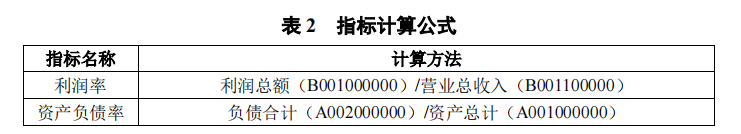

In [25]:
lr_5 = pd.read_csv(r"data/LR_5.csv")

In [26]:
lr_5["利润率"] = lr_5["B001000000"] / lr_5["B001100000"]
lr_5["资产负债率"] = lr_5["A002000000"] / lr_5["A001000000"]

In [27]:
lr_5 = lr_5[lr_5['利润率'].between(-3, 3)]
lr_5 = lr_5[lr_5['资产负债率'].between(-3, 3)]

In [28]:
lr_5.to_csv(r'data/LR_new.csv', index=False, encoding='utf-8')

# 任务 2 财务数据指标分析及可视化

## 任务 2.1 
读取“LR_new.csv”，根据表 3 要求统计数据，绘制相关的“行业营业利润对比分析”图，每张图表需在报告中进行呈现及分析。
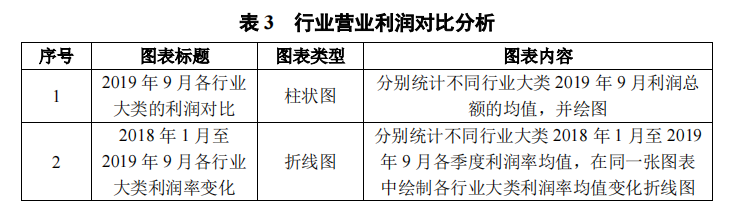

In [29]:
lr_new = pd.read_csv(r"data/LR_new.csv")

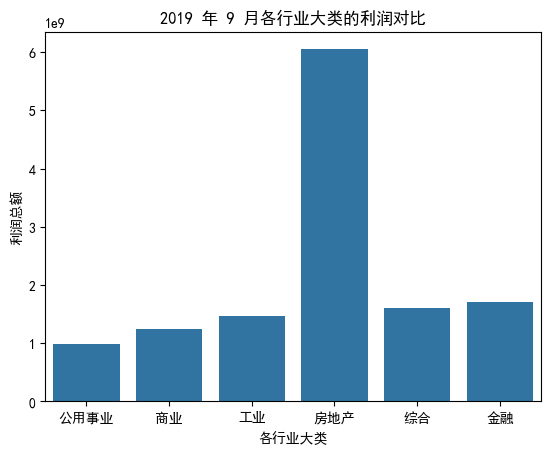

In [30]:
lr_new['Accper'] = pd.to_datetime(lr_new['Accper'])  
time_data1 = lr_new[(lr_new['Accper'].dt.year == 2019) & (lr_new['Accper'].dt.month == 9)]
lrze_means = time_data1.groupby('Indnme')['B001000000'].mean()   # 利润总额

sns.barplot(x=lrze_means.index, y=lrze_means)  
plt.title('2019 年 9 月各行业大类的利润对比')
plt.xlabel('各行业大类')
plt.ylabel('利润总额')
plt.show()

分析：

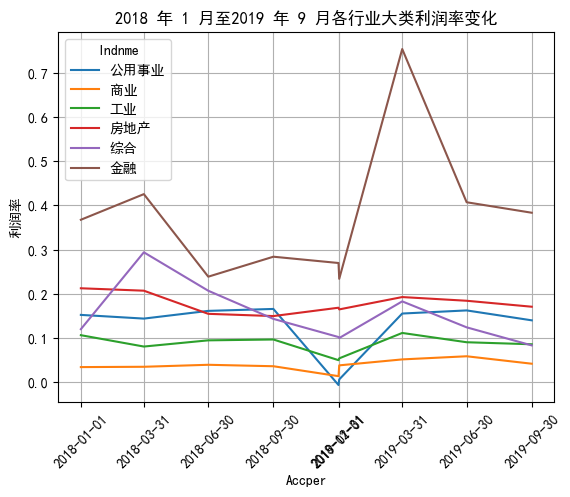

In [31]:
data = lr_new[lr_new['Accper'].dt.year >= 2018].groupby(['Indnme','Accper'])["利润率"].mean()
data_df = data.reset_index() #转化为一个DataFrame
date = lr_new['Accper'].dt.strftime('%Y-%m-%d').unique() # 得到日期

# fig = plt.figure(figsize=(15,10))
sns.lineplot(x="Accper", y="利润率",hue="Indnme", data=data_df)
# plt.plot(data_df['Accper'],data_df['利润率'])
plt.grid()
plt.xticks(date,rotation=45)
plt.title("2018 年 1 月至2019 年 9 月各行业大类利润率变化")


plt.show()

分析：

## 任务 2.2 
读取“LR_new.csv”，根据任务 2.1 结果，确定 2019 年 9 月营业利润率均值排名第 1 的行业大类，并按表 4 要求绘制该行业大类相关的“行业企业营收分析”图，每张图表需在报告中进行呈现及分析。
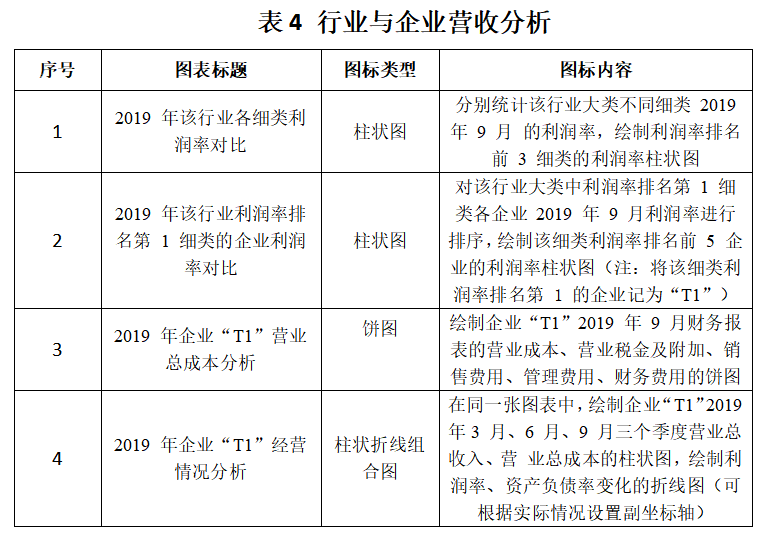

In [32]:
lr_new = pd.read_csv(r"data/LR_new.csv")

In [33]:
# 得到2019年9月利润率均值排名第一的行业大类
lr_new['Accper'] = pd.to_datetime(lr_new['Accper'])  
profit_mean = lr_new[(lr_new['Accper'].dt.year == 2019) & (lr_new['Accper'].dt.month == 9)].groupby("Indnme")["利润率"].mean()
profit_mean_df = profit_mean.reset_index()

max_profit_indnm = profit_mean_df['Indnme'][profit_mean_df['利润率'].idxmax()]
display(profit_mean_df,max_profit_indnm)

,Indnme,利润率
0,公用事业,0.140228
1,商业,0.042173
2,工业,0.086121
3,房地产,0.170992
4,综合,0.083573
5,金融,0.383390


'金融'

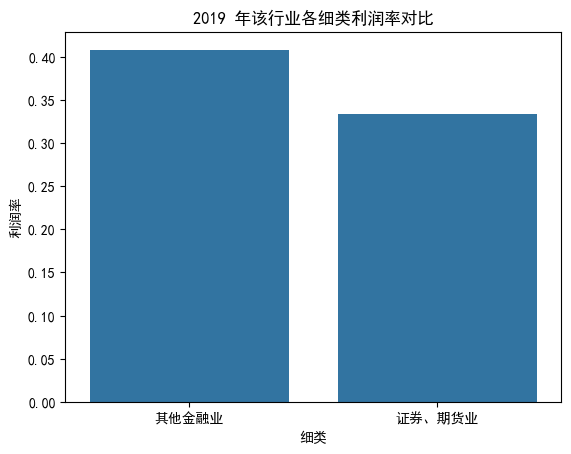

In [34]:
# 分别统计该行业大类不同细类 2019 年 9 月的利润率，绘制利润率排名前 3 细类的利润率柱状图
lr_max = lr_new[(lr_new["Indnme"]==max_profit_indnm) & (lr_new['Accper'].dt.year == 2019) & (lr_new['Accper'].dt.month == 9)]
profit_mean = lr_max.groupby("Nindnme")['利润率'].mean()
profit_mean_df = profit_mean.reset_index()
sns.barplot(x="Nindnme", y="利润率",data=profit_mean_df)
plt.title("2019 年该行业各细类利润率对比")
plt.xlabel("细类")
plt.show()

分析：

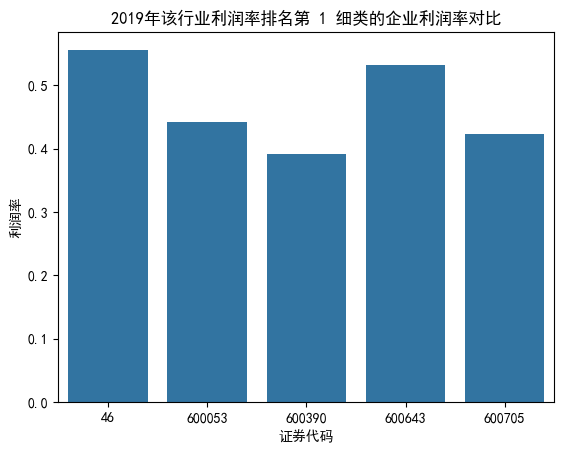

In [35]:
# 对该行业大类中利润率排名第 1 细类各企业 2019 年 9 月利润率进行排序，绘制该细类利润率排名前 5 企业的利润率柱状图
# （注：将该细类利润率排名第 1 的企业记为“T1”）

max_profit_nindnme = profit_mean_df['Nindnme'][profit_mean_df['利润率'].idxmax()]
data_2 = lr_new[(lr_new["Nindnme"]==max_profit_nindnme) & (lr_new['Accper'].dt.year == 2019) & (lr_new['Accper'].dt.month == 9)]
T = data_2.loc[:,['Stkcd','利润率']]
# 按利润率降序排序
T_sorted = T.sort_values(by='利润率', ascending=False)
top5 = T_sorted.head(5)
sns.barplot(x="Stkcd", y="利润率",data=top5)
plt.title("2019年该行业利润率排名第 1 细类的企业利润率对比")
plt.xlabel("证券代码")
plt.show()
T1 = top5.iloc[0]["Stkcd"]

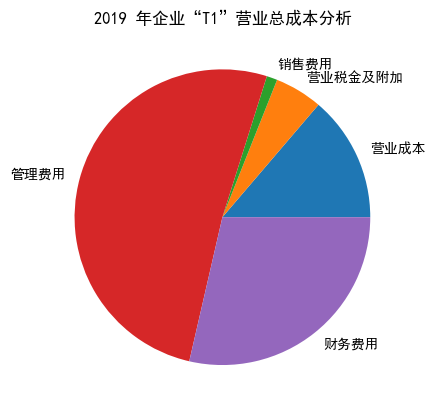

In [36]:
# 绘制企业“T1”2019 年 9 月财务报表的营业成本、营业税金及附加、销售费用、管理费用、财务费用的饼图
# 营业成本 B001201000 ; 营业税金及附加 B001207000 ; 销售费用 B001209000 ; 管理费用 B001210000; 财务费用 B001211000

T1_data = lr_new[(lr_new["Stkcd"]==T1) & (lr_new['Accper'].dt.year == 2019) & (lr_new['Accper'].dt.month == 9)]
labels = ['营业成本','营业税金及附加','销售费用','管理费用','财务费用']
data_3 = T1_data.loc[:,['B001201000','B001207000','B001209000','B001210000','B001211000']]
sizes = data_3.values.flatten() # 二维转一维数组
plt.pie(sizes,labels=labels)
plt.title("2019 年企业“T1”营业总成本分析")
plt.show()

In [37]:
# 在同一张图表中，绘制企业“T1”2019 年3 月、6 月、9 月三个季度营业总收入、营业总成本的柱状图，绘制利润率、资产负债率变化的折线图
#（可根据实际情况设置副坐标轴）
# 营业总收入 B001100000 ;营业总成本 B001200000


## 任务 2.3 
利用可视化大屏制作工具，将任务 2.1 和任务 2.2 所列的 6 张图制作成一个大屏，大屏命名为“行业与企业营业数据分析”，并在报告中呈现。要求大屏整体设计美观、布局清晰直观。

# 任务 3 企业利润预测及财务造假识别

## 任务 3.1 
读取“financial_data.csv”，计算各个指标与利润总额的相关性，挑选相关度最高的 5 个指标。

In [38]:
data_df = pd.read_csv("data/financial_data.csv")
data_df

,TICKER_SYMBOL,END_DATE,LDBL,LXBZBS,ZCFZL,CHZZL,ZCBCL,CHZLDZCB,CQZBSYL,YYMLL,YSL,YSZKZZL,YYSR,YYCB,YYSJJFJ,YWFY,ZCJZSS,LRZE,FLAG
0,4019,1,8.24911,1.83324,0.10018,3.13214,0.09723,0.07257,0.10554,0.97278,0.15610,0.26727,4.795006e+08,2.935500e+08,1505596.10,7.039946e+07,2.311976e+07,1.249776e+08,0
1,8166,1,1.30010,15.58644,0.66081,3.33273,0.07795,0.22293,0.21593,0.92089,0.12659,0.06131,5.325324e+09,3.498736e+09,28213513.69,1.373892e+09,2.993087e+07,4.152227e+08,0
2,11737,1,4.62003,3.31066,0.17311,1.19244,0.08734,0.18267,0.10118,1.00495,0.09472,0.26297,1.683760e+09,7.883673e+08,8298888.47,5.864694e+08,1.766300e+06,3.843256e+08,0
3,16479,1,2.77734,3.59707,0.35293,5.12706,0.04856,0.13312,0.06808,0.98878,0.14381,0.11057,2.229978e+09,1.743231e+09,11585500.32,3.942345e+08,4.007796e+06,1.219177e+08,0
4,16842,1,2.48068,68.08648,0.33309,4.27485,0.19819,0.29959,0.28469,0.90921,0.14099,0.25481,3.945543e+08,2.986392e+08,1621817.64,3.724401e+07,9.700969e+05,6.042674e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,4972481,5,3.64288,1.47813,0.20650,1.48154,0.01181,0.21106,0.01474,0.96395,-0.04424,0.26521,3.187077e+09,2.332899e+09,41086201.40,7.169814e+08,1.596090e+08,7.251489e+07,0
10990,4974017,5,0.91892,1.32309,0.77146,9.28289,0.11159,0.09631,0.27429,0.66298,0.14253,0.33817,5.084375e+09,3.835234e+09,35055348.03,6.898297e+08,4.529733e+07,5.001893e+08,0
10991,4982623,5,1.07324,5.36575,0.59109,7.93089,0.08739,0.11882,0.19149,0.97813,0.09868,0.53492,7.317580e+09,5.910776e+09,30234734.51,6.067408e+08,6.699604e+07,7.919023e+08,0
10992,4990167,5,3.90107,4.00575,0.25074,3.17843,0.21220,0.20271,0.24398,0.84714,0.17625,0.24263,2.084624e+09,1.088311e+09,19792091.43,3.979807e+08,2.879632e+07,5.645285e+08,0


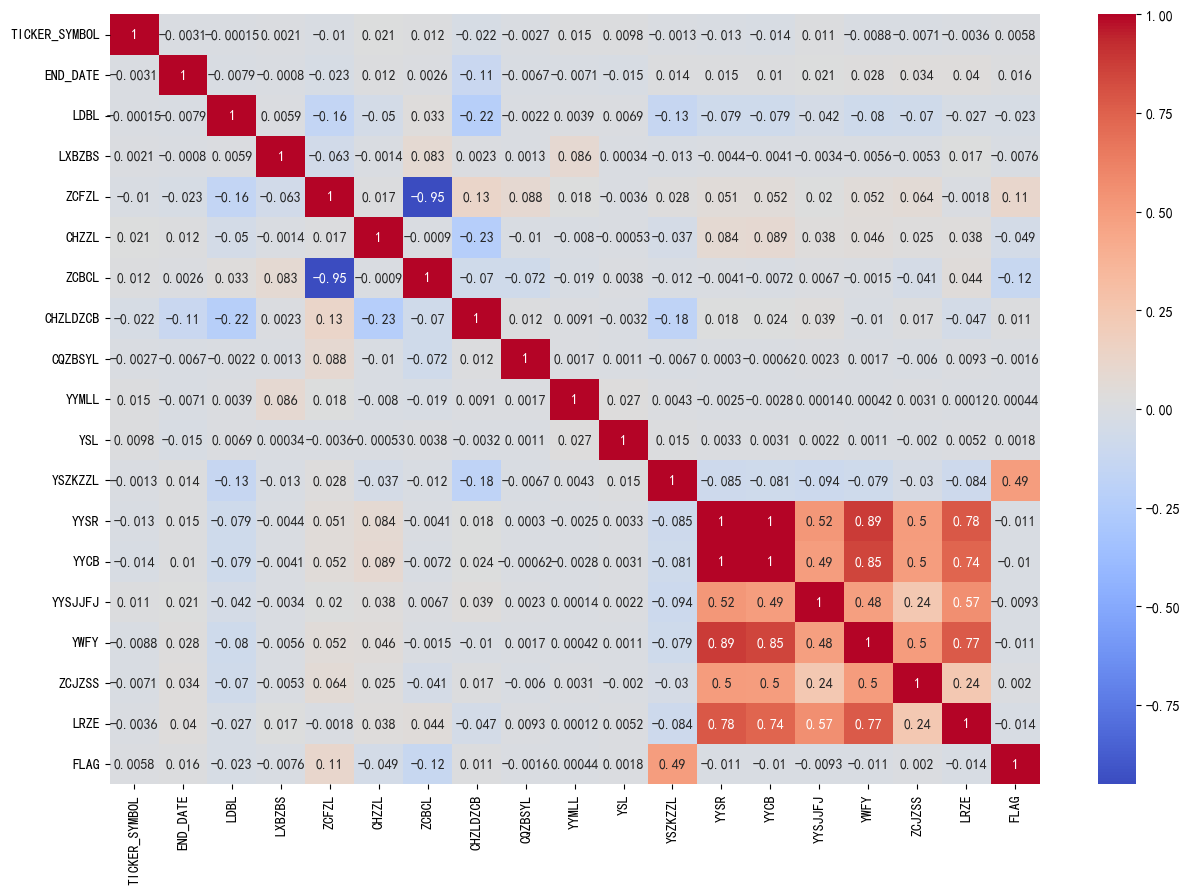

In [39]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm') # .corr计算相关系数
plt.show()

选取的5个指标分别为： YYSR；YYCB；YYSJJFJ；YWFY；ZCJZSS

## 任务 3.2 
利用挑选的 5 个指标建立企业利润预测模型，运用建立的模型预测“test.csv”表中给定企业的利润总额，并将预测结果以表格的形式在报告中呈现。

In [40]:
train_df = data_df.loc[:, ['YYSR', 'YYCB',
                           'YYSJJFJ', 'YWFY', 'ZCJZSS', 'LRZE']]
train_df = train_df[(train_df['YYSR'] > 0) & (train_df['YYCB'] > 0) & (
    train_df['YYSJJFJ'] > 0) & (train_df['YWFY'] > 0) & (train_df['ZCJZSS'] > 0)& (train_df['LRZE'] > 0)]
train_df

,YYSR,YYCB,YYSJJFJ,YWFY,ZCJZSS,LRZE
0,4.795006e+08,2.935500e+08,1505596.10,7.039946e+07,2.311976e+07,1.249776e+08
1,5.325324e+09,3.498736e+09,28213513.69,1.373892e+09,2.993087e+07,4.152227e+08
2,1.683760e+09,7.883673e+08,8298888.47,5.864694e+08,1.766300e+06,3.843256e+08
3,2.229978e+09,1.743231e+09,11585500.32,3.942345e+08,4.007796e+06,1.219177e+08
4,3.945543e+08,2.986392e+08,1621817.64,3.724401e+07,9.700969e+05,6.042674e+07
...,...,...,...,...,...,...
10989,3.187077e+09,2.332899e+09,41086201.40,7.169814e+08,1.596090e+08,7.251489e+07
10990,5.084375e+09,3.835234e+09,35055348.03,6.898297e+08,4.529733e+07,5.001893e+08
10991,7.317580e+09,5.910776e+09,30234734.51,6.067408e+08,6.699604e+07,7.919023e+08
10992,2.084624e+09,1.088311e+09,19792091.43,3.979807e+08,2.879632e+07,5.645285e+08


In [41]:
X = train_df.loc[:,['YYSR','YYCB','YYSJJFJ','YWFY','ZCJZSS']].values
y = train_df.loc[:,'LRZE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#建立LGB的dataset格式数据
lgb_train = LGB.Dataset(X_train, y_train)
lgb_eval = LGB.Dataset(X_test, y_test, reference=lgb_train)

In [43]:
def median_absolute_percentage_error(y_true,y_pred):
    return np.median(np.abs((y_pred-y_true)/y_true))

def regression_metrics(true,pred):
    print('回归模型评估指标结果:')
    print('平均绝对误差【MAE】:',mean_absolute_error(true,pred))
    print('均方误差【MSE】:',mean_squared_error(true,pred))
    print('绝对百分比误差中位数【MedianAPE】:',median_absolute_percentage_error(true,pred))

In [44]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'max_depth': 7,
    'num_leaves' : 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

In [45]:
lgb1 = LGB.train(params,lgb_train,num_boost_round=2000,valid_sets=[lgb_train,lgb_eval])

#预测数据集
y_pred = lgb1.predict(X_test)
#评估模型
regression_metrics(y_test,y_pred)

回归模型评估指标结果:
平均绝对误差【MAE】: 194170811.43519518
均方误差【MSE】: 1.437431784744732e+18
绝对百分比误差中位数【MedianAPE】: 0.3051485549325392


In [46]:
# 选取目标函数和评估函数
objective=['regression_l2','regression_l1','quantile','poisson','mape']
metrics=['l2','mae','quantile','poisson','mape']
metrics_test_data=pd.DataFrame(columns=['objective','metric','MAE','MES','Median APE'])
for i in objective:
    for k in metrics:
        size=metrics_test_data.size
        params = {
            'task': 'train',
            'boosting_type': 'gbdt',
            'objective': i,
            'metric':k,
            'max_depth': 7,
            'num_leaves' : 31,
            'learning_rate': 0.1,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbosity': -1
        }
        gbm = LGB.train(params,lgb_train,num_boost_round=2000,
                valid_sets=lgb_eval)
        y_pred = gbm.predict(X_test)
        metrics_test_data.loc[size]=[i,k,mean_absolute_error(y_test,y_pred),
                                     mean_squared_error(y_test,y_pred),
                                     median_absolute_percentage_error(y_test,y_pred)
                                    ]

In [47]:
metrics_test_data

,objective,metric,MAE,MES,Median APE
0,regression_l2,l2,1.941708e+08,1.437432e+18,0.305149
5,regression_l2,mae,1.941708e+08,1.437432e+18,0.305149
10,regression_l2,quantile,1.941708e+08,1.437432e+18,0.305149
15,regression_l2,poisson,1.941708e+08,1.437432e+18,0.305149
20,regression_l2,mape,1.941708e+08,1.437432e+18,0.305149
25,regression_l1,l2,1.578624e+08,5.624904e+17,0.195801
30,regression_l1,mae,1.578624e+08,5.624904e+17,0.195801
35,regression_l1,quantile,1.578624e+08,5.624904e+17,0.195801
40,regression_l1,poisson,1.578624e+08,5.624904e+17,0.195801
45,regression_l1,mape,1.578624e+08,5.624904e+17,0.195801


In [48]:
# regression_l1  poisson
neg_median_absolute_percentage_error=make_scorer(median_absolute_percentage_error,greater_is_better=False)

In [49]:
# 开始gridsearch
model_lgb = LGB.LGBMRegressor(objective='regression_l1',
                              metric='poisson',
                              learning_rate=0.19,
                              subsample = 0.9,
                              colsample_bytree = 0.8,
                              subsample_freq = 5,
                              max_depth = 10,
                              num_leaves=84,
                              min_child_samples=23,
                              min_child_weight=0.001,
                              reg_alpha=0.08,
                              reg_lambda=0.08)


params_test1 = {
    'learning_rate': np.arange(0.01, 0.2, 0.01), #学习率
#     'max_depth': range(7, 11, 1),  # 基学习器的最大树深度
#     'num_leaves': range(80, 90, 1),  # 基学习器的最大叶子节点数
#     'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3],  # 权重的L1正则化项
#     'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3],  # 权重的L2正则化项
#     'min_child_samples': [19, 20, 21, 22, 23, 24, 25],  # 子节点（叶节点）中所需的最小数据数
#     'min_child_weight': [0.001, 0.002]  # 子节点（叶节点）中所需的最小实例权重（Hessian）总和
#     'subsample': [0.8,0.9,0.95],
#     'colsample_bytree': [0.6,0.7,0.8,0.9] 

}
gsearch1 = GridSearchCV(estimator=model_lgb,
                        param_grid=params_test1,
                        scoring=neg_median_absolute_percentage_error,
                        cv=5,
                        verbose=0)
gsearch1.fit(X, y)
print('Best parameters found by grid search are:', gsearch1.best_params_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7271, number of used features: 5
[LightGBM] [Info] Start training from score 126689888.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7271, number of used features: 5
[LightGBM] [Info] Start training from score 126066512.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7271, number of used features: 5
[LightGBM] [Info]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-ch

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7271, number of used features: 5
[LightGBM] [Info] Start training from score 115975248.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7271, number of used features: 5
[LightGBM] [Info] Start training from score 115975248.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7271, number of used features: 5
[LightGBM] [Info] Start training from score 115975248.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7271, number of used features: 5
[LightGBM] [Info] Start training from score 121292696.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7271, number of used features: 5
[LightGBM] [Info] Start training from score 115975248.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7272, number of used features: 5
[LightGBM] [Info] Start training from score 112120760.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [50]:
params = {
    'objective':'regression_l1',
    'metric':'poisson',
    'learning_rate':0.19,
    'subsample':0.9,
    'colsample_bytree' : 0.8,
    'subsample_freq' : 5,
    'max_depth':10,
    'num_leaves':84,
    'min_child_samples':23, 
    'min_child_weight':0.001,
    'reg_alpha':0.08,
    'reg_lambda':0.08,
    'verbosity': -1
}

In [51]:
callback=[LGB.early_stopping(stopping_rounds=10,verbose=True)]
lgb2 = LGB.train(params,lgb_train,num_boost_round=2000,valid_sets=[lgb_train,lgb_eval])

#预测数据集
y_pred = lgb2.predict(X_test)
#评估模型
regression_metrics(y_test,y_pred)

回归模型评估指标结果:
平均绝对误差【MAE】: 156082930.11837044
均方误差【MSE】: 5.365816903334648e+17
绝对百分比误差中位数【MedianAPE】: 0.20272152865850285


In [52]:
df = pd.read_csv("data/test.csv")
df = df.dropna(thresh=6)
test_df = df.loc[:,['TICKER_SYMBOL','YYSR','YYCB','YYSJJFJ','YWFY','ZCJZSS']]
test_df = test_df[test_df['ZCJZSS'] >= 0] # 删去<0的异常值
test_df

,TICKER_SYMBOL,YYSR,YYCB,YYSJJFJ,YWFY,ZCJZSS
0,4953174.0,3.501238e+09,2.593604e+09,40980752.40,4.217535e+08,56811586.41
1,4961537.0,8.278759e+09,6.870074e+09,44977835.37,1.314004e+09,49340166.13
2,4962538.0,1.510889e+09,1.205632e+09,10993321.61,1.519945e+08,2002192.75
3,4968740.0,7.321226e+08,4.122802e+08,7623557.16,1.214044e+08,7830051.21
4,4973917.0,5.315053e+08,3.006819e+08,3375275.50,1.306369e+08,8648374.78
5,4978589.0,5.261743e+09,4.205669e+09,43401622.79,8.048720e+08,15798060.19
7,4986535.0,1.142787e+09,8.463056e+08,10844601.28,1.670473e+08,4239790.36
8,4990739.0,1.504147e+09,8.791528e+08,27017358.53,3.328449e+08,8435484.41
9,4990942.0,1.382050e+09,1.086799e+09,17193628.21,1.718616e+08,40172500.21


In [53]:
test_data = test_df.loc[:,['YYSR','YYCB','YYSJJFJ','YWFY','ZCJZSS']].values
y_pred = lgb2.predict(test_data)
test_df['LRZE'] = y_pred
result = test_df.loc[:,['TICKER_SYMBOL','LRZE']]

In [54]:
result

,TICKER_SYMBOL,LRZE
0,4953174.0,5.433282e+08
1,4961537.0,1.844184e+08
2,4962538.0,1.431871e+08
3,4968740.0,1.935052e+08
4,4973917.0,9.524530e+07
5,4978589.0,2.144007e+08
7,4986535.0,1.355310e+08
8,4990739.0,2.606995e+08
9,4990942.0,9.373639e+07


参考：https://zhuanlan.zhihu.com/p/531784901 LightGBM回归预测模型构建 - 含GBM调参方法

## 任务 3.3 
“financial_data.csv”中包含一个“FLAG”字段用于标识财务数据
造假（“1”表示财务造假）。请利用表 6 所列关键因子，对样本数据
“financial_data.csv”进行分析，挖掘财务造假的识别特征。根据你们的分析，对
“financial_data_new.csv”所列 5 个企业的财务数据进行筛查，识别其中唯一的
1 个涉嫌财务造假企业，并在报告中描述分析方法与结果

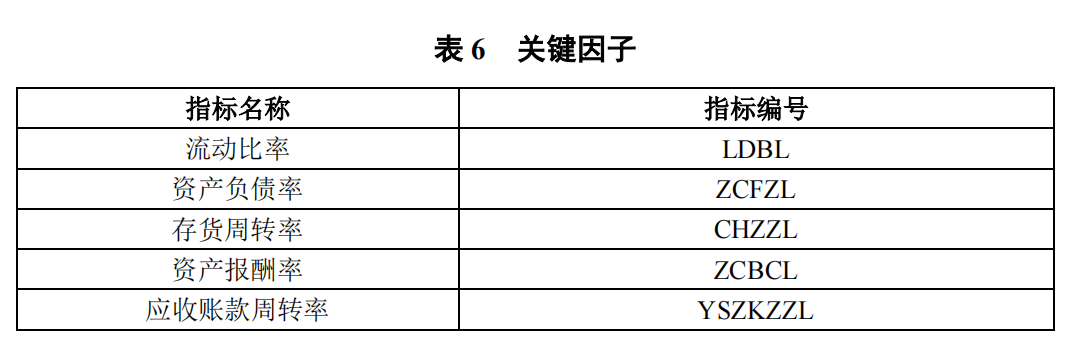

In [55]:
fake_data_df = data_df.loc[:,['LDBL','ZCFZL','CHZZL','ZCBCL','YSZKZZL','FLAG']]
qy_df = pd.read_csv("data/financial_data_new.csv")
qy_df = qy_df.loc[:,['TICKER_SYMBOL','LDBL','ZCFZL','CHZZL','ZCBCL','YSZKZZL']]
display(fake_data_df,qy_df)

,LDBL,ZCFZL,CHZZL,ZCBCL,YSZKZZL,FLAG
0,8.24911,0.10018,3.13214,0.09723,0.26727,0
1,1.30010,0.66081,3.33273,0.07795,0.06131,0
2,4.62003,0.17311,1.19244,0.08734,0.26297,0
3,2.77734,0.35293,5.12706,0.04856,0.11057,0
4,2.48068,0.33309,4.27485,0.19819,0.25481,0
...,...,...,...,...,...,...
10989,3.64288,0.20650,1.48154,0.01181,0.26521,0
10990,0.91892,0.77146,9.28289,0.11159,0.33817,0
10991,1.07324,0.59109,7.93089,0.08739,0.53492,0
10992,3.90107,0.25074,3.17843,0.21220,0.24263,0


,TICKER_SYMBOL,LDBL,ZCFZL,CHZZL,ZCBCL,YSZKZZL
0,4992858,1.08190,0.43580,2.36745,0.02721,0.21712
1,4993201,1.18628,0.51038,3.13126,0.11496,0.19357
2,4998808,0.85226,0.57374,0.81894,0.02719,0.24420
3,4897311,1.30825,0.48336,0.36807,0.02947,1.24359
4,4999709,0.90699,0.52007,2.76637,0.09150,0.21569


In [56]:
X = fake_data_df.loc[:,['LDBL','ZCFZL','CHZZL','ZCBCL','YSZKZZL']].values
y = fake_data_df['FLAG'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
clf = LGBMClassifier()

In [58]:
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 73, number of negative: 8722
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 8795, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008300 -> initscore=-4.783144
[LightGBM] [Info] Start training from score -4.783144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier()

In [59]:
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)
print("训练集准确率：",accuracy_score(y_train,train_predict))
print("测试集准确率:",accuracy_score(y_test,test_predict))

训练集准确率： 1.0
测试集准确率: 1.0


In [60]:
data = qy_df.loc[:,['LDBL','ZCFZL','CHZZL','ZCBCL','YSZKZZL']].values

In [61]:
predict = clf.predict(data)
predict

array([0, 0, 0, 1, 0], dtype=int64)

In [62]:
qy_df['FLAG']=predict
qy_df

,TICKER_SYMBOL,LDBL,ZCFZL,CHZZL,ZCBCL,YSZKZZL,FLAG
0,4992858,1.08190,0.43580,2.36745,0.02721,0.21712,0
1,4993201,1.18628,0.51038,3.13126,0.11496,0.19357,0
2,4998808,0.85226,0.57374,0.81894,0.02719,0.24420,0
3,4897311,1.30825,0.48336,0.36807,0.02947,1.24359,1
4,4999709,0.90699,0.52007,2.76637,0.09150,0.21569,0


所以预测的TICKER_SYMBOL=4897311的公司为造假企业